In [5]:
import sys
print(sys.path)


['e:\\Project\\dsr32\\12NLP_Transfer_Learning', 'c:\\Users\\DAnand\\anaconda3\\envs\\tf-gpu\\python39.zip', 'c:\\Users\\DAnand\\anaconda3\\envs\\tf-gpu\\DLLs', 'c:\\Users\\DAnand\\anaconda3\\envs\\tf-gpu\\lib', 'c:\\Users\\DAnand\\anaconda3\\envs\\tf-gpu', '', 'C:\\Users\\DAnand\\AppData\\Roaming\\Python\\Python39\\site-packages', 'c:\\Users\\DAnand\\anaconda3\\envs\\tf-gpu\\lib\\site-packages', 'c:\\Users\\DAnand\\anaconda3\\envs\\tf-gpu\\lib\\site-packages\\win32', 'c:\\Users\\DAnand\\anaconda3\\envs\\tf-gpu\\lib\\site-packages\\win32\\lib', 'c:\\Users\\DAnand\\anaconda3\\envs\\tf-gpu\\lib\\site-packages\\Pythonwin']


In [2]:
import tensorflow as tf
from tensorflow import keras
# from tensorflow.keras import models, layers
import tensorflow_datasets as tfds
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np

In [3]:
datasets, info = tfds.load(
    "imdb_reviews/plain_text",
    split=["train", "test[:50%]", "test[50%:]"],
    as_supervised=True,
    with_info=True
)
dataset_train_original = datasets[0]
dataset_validate_original = datasets[1]
dataset_test_original = datasets[2]
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset.
    This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_path='C:\\Users\\DAnand\\tensorflow_datasets\\imdb_reviews\\plain_text\\1.0.0',
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_

In [4]:
dataset_train = dataset_train_original.cache()
dataset_train = dataset_train.shuffle(25_000)
dataset_train = dataset_train.batch(128)

dataset_validate = dataset_validate_original.cache()
dataset_validate = dataset_validate.batch(128)

dataset_test = dataset_test_original.batch(128)

In [5]:
def render_history(history):
    plt.title("Our losses")
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.legend()
    plt.show()
    plt.close()

    plt.title("Our accuracies")
    plt.plot(history.history["accuracy"], label="accuracy")
    plt.plot(history.history["val_accuracy"], label="val_accuracy")
    plt.legend()
    plt.show()
    plt.close()

In [7]:
vocabulary_size = 10_000
sequence_length = 128

encoder = keras.layers.TextVectorization(
    max_tokens=vocabulary_size,
    output_sequence_length=sequence_length,
    standardize="lower_and_strip_punctuation",
    split="whitespace",
    output_mode="int"
)
encoder.adapt(dataset_train_original.map(lambda text, label: text).batch(512))

In [8]:
model = keras.models.Sequential()
model.add(encoder)
model.add(keras.layers.Embedding(input_dim=vocabulary_size, output_dim=32))
model.add(keras.layers.LSTM(64))
model.add(keras.layers.Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 128)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 128, 32)           320000    
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 344,897
Trainable params: 344,897
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    dataset_train,
    epochs=30,
    validation_data=dataset_validate
)

Epoch 1/30
196/196 [==============================] - 17s 62ms/step - loss: 0.5764 - accuracy: 0.6624 - val_loss: 0.4057 - val_accuracy: 0.8173
Epoch 2/30
196/196 [==============================] - 10s 49ms/step - loss: 0.3252 - accuracy: 0.8699 - val_loss: 0.3916 - val_accuracy: 0.8360
Epoch 3/30
196/196 [==============================] - 11s 57ms/step - loss: 0.2607 - accuracy: 0.9025 - val_loss: 0.4136 - val_accuracy: 0.8305
Epoch 4/30
196/196 [==============================] - 14s 72ms/step - loss: 0.2079 - accuracy: 0.9251 - val_loss: 0.4559 - val_accuracy: 0.8089
Epoch 5/30
196/196 [==============================] - 11s 55ms/step - loss: 0.1718 - accuracy: 0.9396 - val_loss: 0.5003 - val_accuracy: 0.8085
Epoch 6/30
196/196 [==============================] - 11s 54ms/step - loss: 0.1413 - accuracy: 0.9518 - val_loss: 0.6294 - val_accuracy: 0.8057
Epoch 7/30
196/196 [==============================] - 11s 54ms/step - loss: 0.1165 - accuracy: 0.9624 - val_loss: 0.5488 - val_accuracy:

In [ ]:
# history = model.fit(
#     dataset_train,
#     epochs=10,
#     validation_data=dataset_validate
# )

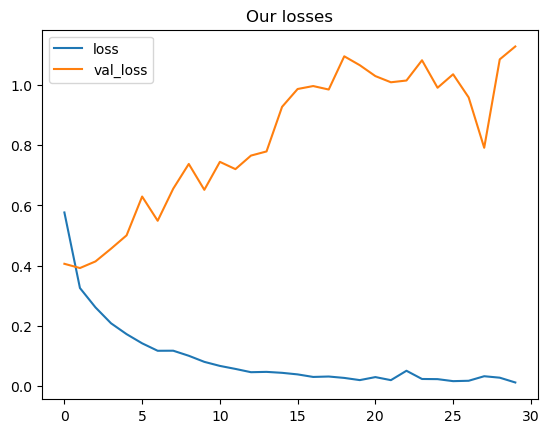

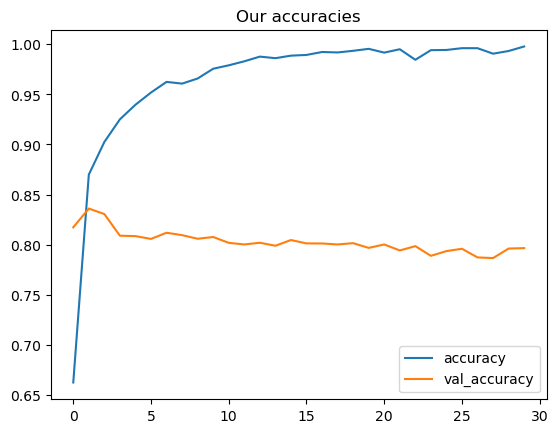

In [10]:

render_history(history)

In [16]:
!nvidia-smi

Fri Oct 28 10:42:24 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 522.25       Driver Version: 522.25       CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A    0C    P8    N/A /  N/A |   3994MiB /  4096MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [12]:
print('GPU name: ', tf.config.experimental.list_physical_devices('GPU'))

GPU name:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [24]:
model = keras.models.Sequential()
model.add(encoder)
model.add(keras.layers.Embedding(input_dim=vocabulary_size, output_dim=32))
model.add(keras.layers.LSTM(64, return_sequences=True))
model.add(keras.layers.LSTM(128, return_sequences=False))
# model.add(keras.layers.LSTM(256))
model.add(keras.layers.Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 128)              0         
 torization)                                                     
                                                                 
 embedding_5 (Embedding)     (None, 128, 32)           320000    
                                                                 
 lstm_9 (LSTM)               (None, 128, 64)           24832     
                                                                 
 lstm_10 (LSTM)              (None, 128)               98816     
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 443,777
Trainable params: 443,777
Non-trainable params: 0
________________________________________________

In [25]:

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    dataset_train,
    epochs=5,
    validation_data=dataset_validate
)

Epoch 1/5
196/196 [==============================] - 21s 86ms/step - loss: 0.5116 - accuracy: 0.7253 - val_loss: 0.3782 - val_accuracy: 0.8314
Epoch 2/5
196/196 [==============================] - 15s 78ms/step - loss: 0.3014 - accuracy: 0.8818 - val_loss: 0.3937 - val_accuracy: 0.8291
Epoch 3/5
196/196 [==============================] - 15s 78ms/step - loss: 0.2391 - accuracy: 0.9096 - val_loss: 0.4808 - val_accuracy: 0.8112
Epoch 4/5
196/196 [==============================] - 15s 78ms/step - loss: 0.2051 - accuracy: 0.9264 - val_loss: 0.5079 - val_accuracy: 0.8201
Epoch 5/5
196/196 [==============================] - 15s 78ms/step - loss: 0.1636 - accuracy: 0.9421 - val_loss: 0.5005 - val_accuracy: 0.8137


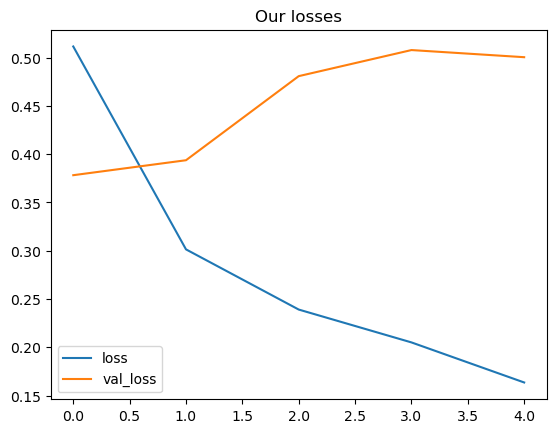

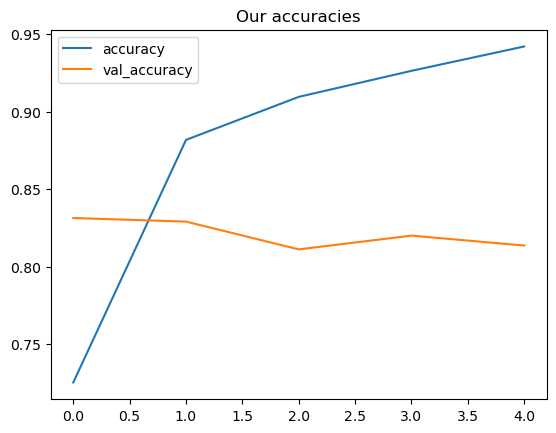

In [26]:
render_history(history)

In [27]:
model = keras.models.Sequential()
model.add(encoder)
model.add(keras.layers.Embedding(input_dim=vocabulary_size, output_dim=32))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=False)))
# model.add(keras.layers.LSTM(128, return_sequences=False))
# model.add(keras.layers.LSTM(256))
model.add(keras.layers.Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 128)              0         
 torization)                                                     
                                                                 
 embedding_6 (Embedding)     (None, 128, 32)           320000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              49664     
 l)                                                              
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 369,793
Trainable params: 369,793
Non-trainable params: 0
_________________________________________________________________


In [29]:
model = keras.models.Sequential()
model.add(encoder)
model.add(keras.layers.Embedding(input_dim=vocabulary_size, output_dim=32))
model.add(keras.layers.GRU(64))
# model.add(keras.layers.LSTM(128, return_sequences=False))
# model.add(keras.layers.LSTM(256))
# model.add(keras.layers.Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 128)              0         
 torization)                                                     
                                                                 
 embedding_8 (Embedding)     (None, 128, 32)           320000    
                                                                 
 gru_1 (GRU)                 (None, 64)                18816     
                                                                 
Total params: 338,816
Trainable params: 338,816
Non-trainable params: 0
_________________________________________________________________


: 